Initial Dataset:
   Emp_ID   Name Department  Experience  Monthly_Salary  Performance_Rating
0     101   John         HR         3.0         40000.0                   7
1     102   Mary    Finance         7.0         60000.0                   9
2     103  Steve         IT         5.0         55000.0                   8
3     104   Lara         IT         9.0         75000.0                  10
4     105    Tom         HR         4.0         42000.0                   6 

Statistical Summary:
          Emp_ID  Experience  Monthly_Salary  Performance_Rating  \
count   20.00000   20.000000       20.000000           20.000000   
mean   110.50000    5.666667    55800.000000            7.750000   
std      5.91608    2.294157    11669.122549            1.482352   
min    101.00000    2.000000    39000.000000            5.000000   
25%    105.75000    4.000000    47250.000000            7.000000   
50%    110.50000    5.666667    52000.000000            8.000000   
75%    115.25000    7.000000

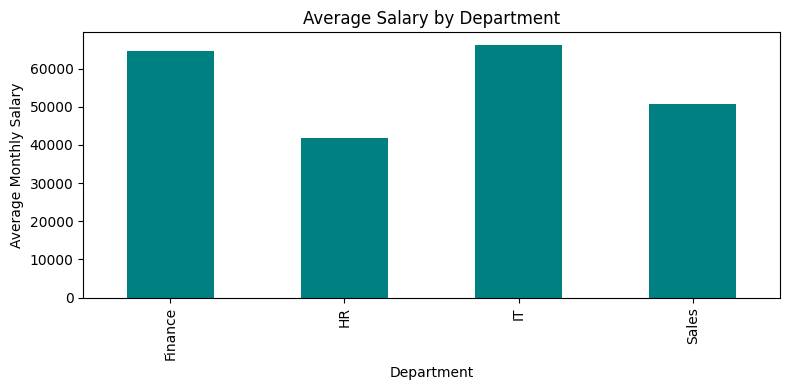

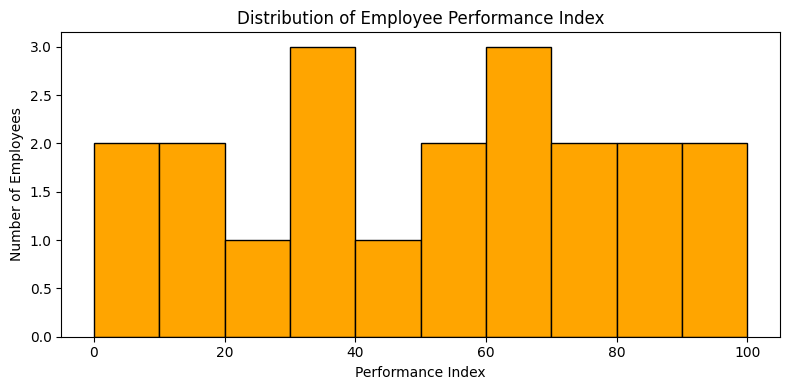

 Key Insights:
- Average salary across company: ₹55800.00
- Average performance index: 51.67
- Department with highest performance: IT


In [2]:
# ============================================
# EMPLOYEE PERFORMANCE AND SALARY ANALYTICS
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  Create sample employee dataset
data = {
    'Emp_ID': range(101, 121),
    'Name': ['John', 'Mary', 'Steve', 'Lara', 'Tom', 'Nina', 'Alex', 'Sara',
              'David', 'Mia', 'Leo', 'Sophia', 'Ryan', 'Ella', 'Max', 'Chloe',
              'Nick', 'Grace', 'James', 'Olivia'],
    'Department': ['HR', 'Finance', 'IT', 'IT', 'HR', 'Sales', 'Finance', 'HR',
                   'Sales', 'Finance', 'IT', 'Sales', 'HR', 'IT', 'Finance',
                   'Finance', 'Sales', 'HR', 'IT', 'Sales'],
    'Experience': [3, 7, 5, 9, 4, 6, np.nan, 2, 7, 10, 8, 4, 3, 5, 6, 9, np.nan, 2, 7, 5],
    'Monthly_Salary': [40000, 60000, 55000, 75000, 42000, 50000, 68000, 39000,
                       52000, 71000, 64000, 48000, 45000, 67000, np.nan, 72000,
                       52000, 43000, 70000, 51000],
    'Performance_Rating': [7, 9, 8, 10, 6, 7, 8, 5, 9, 9, 8, 7, 6, 9, 8, 10, 7, 5, 9, 8]
}

df = pd.DataFrame(data)
print("Initial Dataset:")
print(df.head(), "\n")

# Data Cleaning: Handle Missing Values
df['Experience'] = df['Experience'].fillna(df['Experience'].mean())
df['Monthly_Salary'] = df['Monthly_Salary'].fillna(df['Monthly_Salary'].median())

# Feature Engineering: Create Performance Index
# Normalize salary and rating using NumPy
salary_scaled = (df['Monthly_Salary'] - df['Monthly_Salary'].min()) / \
                (df['Monthly_Salary'].max() - df['Monthly_Salary'].min())

rating_scaled = (df['Performance_Rating'] - df['Performance_Rating'].min()) / \
                (df['Performance_Rating'].max() - df['Performance_Rating'].min())

# Combine both metrics using weights
df['Performance_Index'] = np.round((0.6 * rating_scaled + 0.4 * salary_scaled) * 100, 2)

# Statistical Summary
print("Statistical Summary:")
print(df.describe(), "\n")

# Department-wise Analysis
dept_summary = df.groupby('Department').agg({
    'Monthly_Salary': ['mean', 'max', 'min'],
    'Experience': 'mean',
    'Performance_Index': 'mean'
}).round(2)

print(" Department-wise Summary:\n", dept_summary, "\n")

# Identify Top Performers
top_performers = df.sort_values(by='Performance_Index', ascending=False).head(5)
print(" Top 5 Performers:\n", top_performers[['Name', 'Department', 'Performance_Index']], "\n")

# Correlation Analysis using NumPy
corr_matrix = np.corrcoef(df['Experience'], df['Monthly_Salary'])
print(f" Correlation between Experience and Salary: {corr_matrix[0,1]:.2f}\n")

# Visualization 1 – Salary by Department
plt.figure(figsize=(8, 4))
df.groupby('Department')['Monthly_Salary'].mean().plot(kind='bar', color='teal')
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Monthly Salary")
plt.tight_layout()
plt.show()

#  Visualization 2 – Performance Index Distribution
plt.figure(figsize=(8, 4))
plt.hist(df['Performance_Index'], bins=10, color='orange', edgecolor='black')
plt.title("Distribution of Employee Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

#  Insights Summary
print(" Key Insights:")
print(f"- Average salary across company: ₹{df['Monthly_Salary'].mean():.2f}")
print(f"- Average performance index: {df['Performance_Index'].mean():.2f}")
print(f"- Department with highest performance: {dept_summary['Performance_Index']['mean'].idxmax()}")
